In [24]:
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt

In [184]:
def bf_label(s, pat=' '):
    return pat.join(tuple([r'$\bf{n}$'.format(n=n) for n in s.split(pat)]))

def hist_plot(x, y, title=None, xlabel=None, rotation=0, figsize=(6,4), color='#00a8ff', fname=None):
    
    fig, axis = plt.subplots(1,1,figsize=figsize)
    xticks, values = np.arange(len(x)), y/sum(y)*100
    n_sample = sum(y)
    axis.bar(xticks, values, width=0.5, alpha=1, color=color, edgecolor='#718093')
    kwargs = dict(fontsize=12, fontname='Tahoma', color='k')
    axis.set_xlabel(xlabel, **kwargs) 
    axis.set_xticks(xticks)
    axis.set_xticklabels(x, rotation=rotation, fontname='Tahoma',fontsize=10,color='k')
    axis.set_yticklabels([])
    axis.set_yticks([])
    axis.set_title(title, fontsize=15, fontname='Tahoma')
    for pos in ['top','right','left']:
        axis.spines[pos].set_visible(False)
    axis.set_xlim(-0.5, len(xticks)-0.5)
    axis.set_ylim(0,min(max(values)*1.15,100))
    for n,nx,ny in zip(y,xticks,values):
        s = '\n'.join(tuple(('{:,.0f}'.format(n),'({:,.0f}%)'.format(n/n_sample*100))))
        axis.annotate(s,(nx,ny+0.5), fontsize=9, color='k', ha='center', va='bottom')
    
    fig.tight_layout()
    if fname is not None: plt.savefig(fname)
    plt.show()

    def pie_plot(x, y, title=None, color=None, explode=(0.1,0), figsize=(6,4), fname=None):

    fig, axis = plt.subplots(1,1,figsize=figsize)
    labels = ['\n'.join(tuple((s,'{:,.0f}'.format(n)))) for (s,n) in zip(x,y)]
    kwargs = dict(explode=explode, labels=labels, autopct='%1.0f%%', shadow=True, 
                  startangle=90, textprops={'fontsize': 12,'fontname':'Tahoma'})
    if color is not None: kwargs['colors'] = color
    axis.pie(y,**kwargs)
    axis.set_facecolor('white')
    axis.set_title(title, fontsize=15, fontname='Tahoma')
    fig.tight_layout()
    if fname is not None: plt.savefig(fname)
    plt.show()

In [188]:
def hist_axis(axis, x, y, title=None, xlabel=None, rotation=0, color='#00a8ff'):
    
    xticks, values = np.arange(len(x)), y/sum(y)*100
    n_sample = sum(y)
    axis.bar(xticks, values, width=0.5, alpha=1, color=color, edgecolor='#718093')
    kwargs = dict(fontsize=12, fontname='Tahoma', color='k')
    axis.set_xlabel(xlabel, **kwargs) 
    axis.set_xticks(xticks)
    axis.set_xticklabels(x, rotation=rotation, fontname='Tahoma',fontsize=10,color='k')
    axis.set_yticklabels([])
    axis.set_yticks([])
    axis.set_title(title, fontsize=15, fontname='Tahoma')
    for pos in ['top','right','left']:
        axis.spines[pos].set_visible(False)
    axis.set_xlim(-0.5, len(xticks)-0.5)
    axis.set_ylim(0,min(max(values)*1.15,100))
    for n,nx,ny in zip(y,xticks,values):
        s = '\n'.join(tuple(('{:,.0f}'.format(n),'({:,.0f}%)'.format(n/n_sample*100))))
        axis.annotate(s,(nx,ny+0.5), fontsize=9, color='k', ha='center', va='bottom')

def pie_axis(axis, x, y, title=None, color=None, explode=(0.1,0)):

    labels = ['\n'.join(tuple((s,'{:,.0f}'.format(n)))) for (s,n) in zip(x,y)]
    kwargs = dict(explode=explode, labels=labels, autopct='%1.0f%%', shadow=True, 
                  startangle=90, textprops={'fontsize': 12,'fontname':'Tahoma'})
    if color is not None: kwargs['colors'] = color
    axis.pie(y,**kwargs)
    axis.set_facecolor('white')
    axis.set_title(title, fontsize=15, fontname='Tahoma')

In [4]:
%cd '/Users/administrator/Downloads'

/Users/administrator/Downloads


In [13]:
cust = pd.read_csv('Summary_cust.TXT',sep='|',encoding='cp874').rename(str.lower,axis=1)
txns = pd.read_csv('summary_txn.TXT',sep='|',encoding='cp874').rename(str.lower,axis=1)

In [14]:
cust.head()

,group_cust,age_tier,d_region,cust
0,X11,1) [18 - 21],1) กรุงเทพฯ,199
1,X11,1) [18 - 21],2)ปริมณฑล,150
2,X11,1) [18 - 21],3)ภาคกลาง,182
3,X11,1) [18 - 21],4)ภาคตะวันออก,92
4,X11,1) [18 - 21],5)ภาคอีสาน,288


In [ ]:
color = ['#b2bec3','#4a69bd','#e55039']
for group in txns['group_cust'].unique()[:1]:
    
    a = cust.loc[cust['group_cust']==group].copy()
    b = a[['age_tier','cust']].groupby('age_tier').agg('sum').reset_index()
    x = [n[n.find(')')+1:].replace(']','').replace('[','') for n in b['age_tier']]
    hist_plot(x,b['cust'],title=u'จำนวนคนตามช่วงอายุ', xlabel=u'ช่วงอายุ', 
              figsize=(7,4), fname=group+'_age.png', color=color[0])

    b = a[['d_region','cust']].groupby('d_region').agg('sum').reset_index()
    x = [n[n.find(')')+1:].replace('ภาค','') for n in b['d_region']]
    hist_plot(x,b['cust'],title=u'จำนวนคนตามภูมิภาคที่ลงทะเบียน', xlabel='', 
              figsize=(7,4), fname=group+'_region.png', color=color[1])

    a = txns.loc[txns['group_cust']==group].copy()
    b = a[['merchant_type','cust']].groupby('merchant_type').agg('sum').reset_index()

    x = ['\n'.join(tuple(n.split('-'))) for n in b['merchant_type']]
    hist_plot(x,b['cust'],title=u'จำนวนการใช้ตามประเภทร้านค้า', xlabel='',
              figsize=(7,4), fname=group+'_shop.png', color=color[2])

    b = a[['same_province','cust']].groupby('same_province').agg('sum').reset_index()
    x = [u'ภายในจังหวัด' if n=='Y' else u'นอกจังหวัด' for n in b['same_province']]
    pie_plot(x,b['cust'], color=color[:2], explode=(0.1,0), figsize=(6,4), 
             title=u'จำนวนการใช้ - ในและนอกจังหวัด', fname=group+'_pie.png')

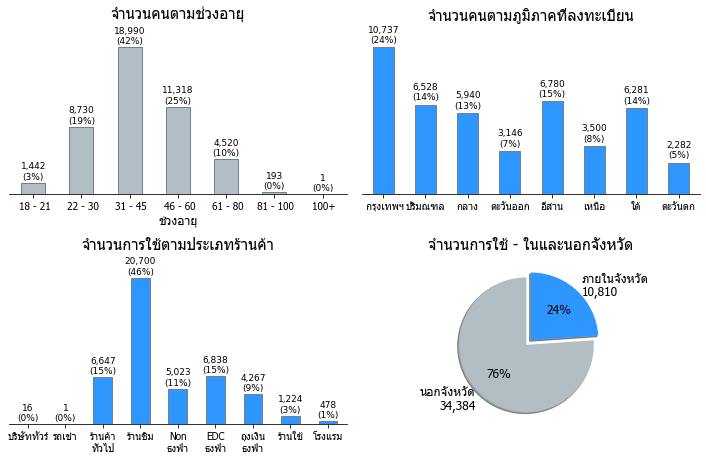

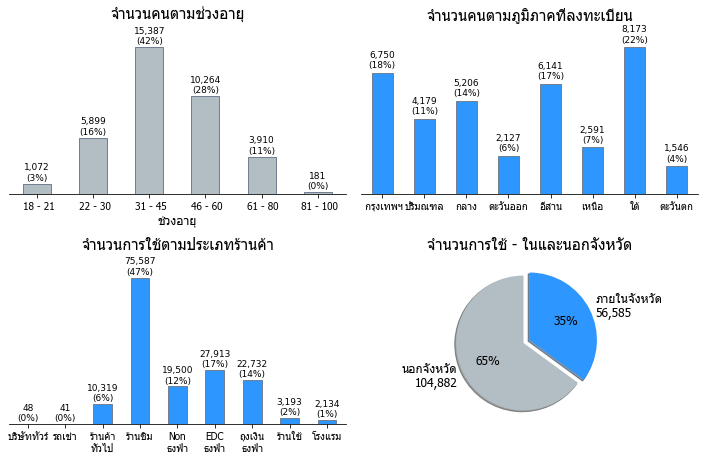

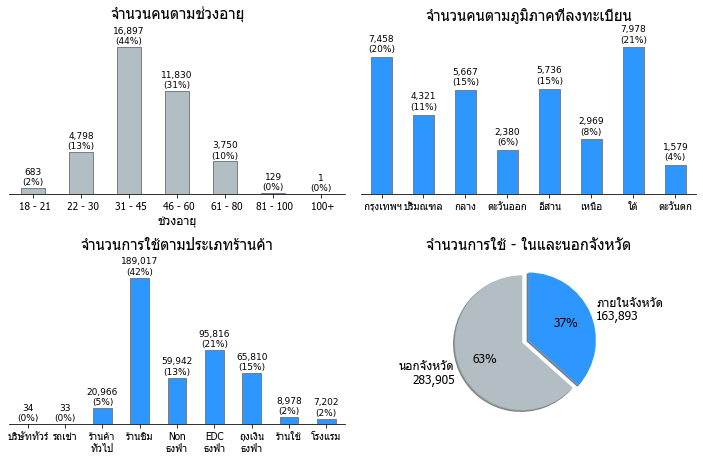

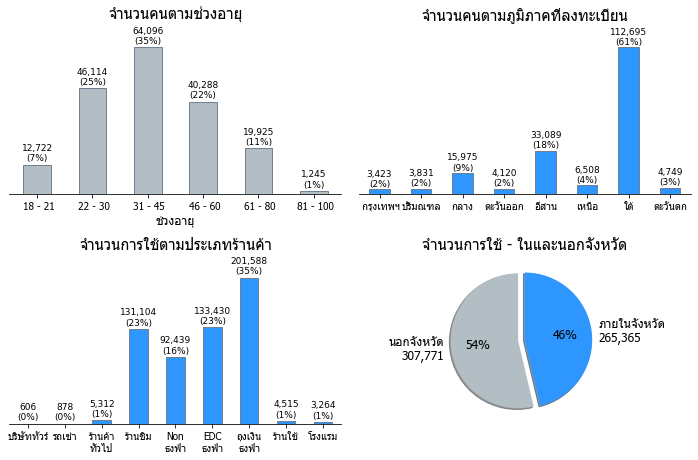

In [233]:
color = ['#b2bec3','#2d96ff','#2c3ea2']

for group in txns['group_cust'].unique():
    
    fig = plt.figure(figsize=(10,6.5))
    axis, grid = np.full(4,None), (2,2)

    axis[0] = plt.subplot2grid(grid,(0,0))
    axis[1] = plt.subplot2grid(grid,(0,1))
    axis[2] = plt.subplot2grid(grid,(1,0))
    axis[3] = plt.subplot2grid(grid,(1,1))
    
    a = cust.loc[cust['group_cust']==group].copy()
    b = a[['age_tier','cust']].groupby('age_tier').agg('sum').reset_index()
    x = [n[n.find(')')+1:].replace(']','').replace('[','') for n in b['age_tier']]
    hist_axis(axis[0], x,b['cust'],title=u'จำนวนคนตามช่วงอายุ', xlabel=u'ช่วงอายุ', color=color[0])

    b = a[['d_region','cust']].groupby('d_region').agg('sum').reset_index()
    x = [n[n.find(')')+1:].replace('ภาค','') for n in b['d_region']]
    hist_axis(axis[1],x,b['cust'],title=u'จำนวนคนตามภูมิภาคที่ลงทะเบียน', xlabel='', color=color[1])

    a = txns.loc[txns['group_cust']==group].copy()
    b = a[['merchant_type','cust']].groupby('merchant_type').agg('sum').reset_index()
    x = ['\n'.join(tuple(n.replace('ร้านช้อป','').split('-'))).strip() for n in b['merchant_type']]
    x = [''.join(n.split('ธงฟ้า')) + '\nธงฟ้า' if n.find('ธงฟ้า')>-1 else n for n in x]
    x = [n.replace('ร้านค้าทั่วไป','ร้านค้า\nทั่วไป') for n in x]
    hist_axis(axis[2], x, b['cust'],title=u'จำนวนการใช้ตามประเภทร้านค้า', color=color[1])

    b = a[['same_province','cust']].groupby('same_province').agg('sum').reset_index()
    x = [u'ภายในจังหวัด' if n=='Y' else u'นอกจังหวัด' for n in b['same_province']]
    pie_axis(axis[3],x,b['cust'], color=color[:2], explode=(0.1,0), title=u'จำนวนการใช้ - ในและนอกจังหวัด')
    
    fig.tight_layout()
    plt.savefig(group+'.png',transparent=True)
    plt.show()